# 处理davis240c的数据集

* kernel 采用[devo](https://github.com/KwanWaiPang/DEVO_comment)
* 数据路径：/media/lfl-data2/davis240c

In [5]:
import numpy as np
import os
import argparse
import multiprocessing #多线程处理
import cv2
import matplotlib.pyplot as plt #绘图


import rosbag #处理rosbag
from sensor_msgs.msg import Image
from cv_bridge import CvBridge
import tqdm as tqdm
import h5py
from utils.bag_utils import read_H_W_from_bag, read_tss_us_from_rosbag, read_images_from_rosbag, read_evs_from_rosbag, read_calib_from_bag, read_t0us_evs_from_rosbag, read_poses_from_rosbag
print("Successfully import ultils to process the rosbag")

Successfully import ultils to process the rosbag


In [6]:
rosbag_file="/media/lfl-data2/davis240c/boxes_translation.bag"
# 从rosbag文件中读取数据
bag_data = rosbag.Bag(rosbag_file, "r")

topics = list(bag_data.get_type_and_topic_info()[1].keys())
print("all the topic name in this rosbag",topics)

all the topic name in this rosbag ['/dvs/camera_info', '/dvs/events', '/dvs/image_raw', '/dvs/imu', '/optitrack/davis']


Read H, W from bag: 180, 240














































































































































































































































































































































100%|██████████| 1298/1298 [00:20<00:00, 62.33it/s]


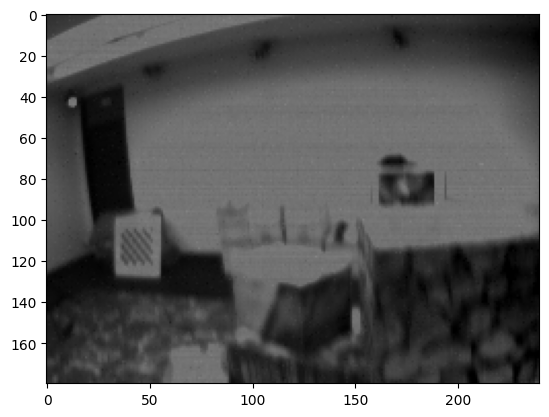

In [10]:
image_topic_name='/dvs/image_raw';

# 读取图像的长与宽
H, W = read_H_W_from_bag(bag_data, image_topic_name)
# print("The height and width of the image is",H,W)
# 读取图像数据
imgs = read_images_from_rosbag(bag_data, image_topic_name, H=H, W=W)

# 看看一张图片
image_index=900;
image=imgs[image_index]
image_color = np.stack([image,image,image],-1)#将三个图像叠加，并沿着最后一个维度堆叠，形成一个彩色图像（RGB）。
plt.imshow(image_color)
plt.show()